In [1]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from datetime import date, timedelta
from pandas import DataFrame
import sqlalchemy as sq
import numpy as np
from sklearn.model_selection import train_test_split
import math
import time
import scipy as scipy
from scipy import stats
import seaborn as sns
from sklearn import linear_model, metrics, preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from ggplot import *
import statsmodels.api as sm
import xgboost as xgb
from xgboost import XGBRegressor
import gc

In [2]:
data1=pd.read_csv('/data/pratik/tensor/ad_clean.csv',error_bad_lines=False)
data2=pd.read_csv('/data/pratik/tensor/sessions.csv',error_bad_lines=False)
data=data1.merge(data2,how='left',on='date')

In [3]:
data.head()

date      brand article_type  gender  qty_sold  live_styles  \
0  20170106      GUESS   Sunglasses  Unisex         7           19   
1  20170106  Cottinfab       Kurtas   Women        15           69   
2  20170106     Speedo     Swimwear     Men         0           15   
3  20170106   Roadster       Shorts     Men        69           28   
4  20170106   Hidelink      Wallets     Men        11           46   

   list_count  inventory  input_td  output_td    ...     styles_age_31_60  \
0      318856        109      55.0   0.564784    ...             0.105263   
1       73539       5721      65.0   0.632423    ...             0.000000   
2        6542         37       0.0   0.000000    ...             0.000000   
3      444504       3767      50.0   0.540380    ...             0.000000   
4       90960      13806      65.0   0.703707    ...             0.000000   

   styles_age_61_90  styles_age_91_120  styles_age_121_150  \
0          0.000000           0.000000            0.000000   
1          0.000000           0.000000            0.043478   
2          0.000000           0.000000            0.000000   
3          0.107143           0.321429            0.000000   
4          1.000000           0.000000            0.000000   

   styles_age_180plus  lp_pdp_conversion  lc_share_ag  lc_share_pltf  \
0            0.052632           0.004221     0.070404       0.035664   
1            0.391304           0.029699     0.000908       0.008225   
2            0.000000           0.017579     0.113784       0.000732   
3            0.428571           0.007165     0.085219       0.049718   
4            0.000000           0.011027     0.046804       0.010174   

   lc_share_ag_to_pltf  Sessions  
0             0.003377   7075043  
1             0.060370   7075043  
2             0.000043   7075043  
3             0.003889   7075043  
4             0.001449   7075043  

[5 rows x 26 columns]

In [4]:
bag_summary=data.groupby(['brand','article_type','gender']).agg({'qty_sold' : np.sum})
bag_summary.reset_index(inplace=True)
bag_summary.sort_values(by='qty_sold',ascending=False).head(n=10)

brand  article_type gender  qty_sold
11438     Roadster       Tshirts    Men    295991
11419     Roadster        Shirts    Men    176441
8898   Moda Rapido       Tshirts    Men     92483
11391     Roadster  Casual Shoes    Men     85161
11406     Roadster         Jeans    Men     84584
245            AKS        Kurtas  Women     78623
1100         Anouk        Kurtas  Women     78047
14576            W        Kurtas  Women     68389
5641    HIGHLANDER        Shirts    Men     61140
7794         Libas        Kurtas  Women     59130

In [6]:
data_bag=data[(data['brand']=='AKS') & (data['article_type']=='Kurtas') & (data['gender']=='Women') ]

In [ ]:
data_roadster_tshirts.to_csv('raw_data.csv',index=False)

In [7]:
univariate=data_bag.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()
#univariate.to_csv('univariate.csv')
univariate

count          mean           std           min  \
date                 102.0  2.017026e+07  1.030139e+02  2.017011e+07   
qty_sold             102.0  7.708137e+02  2.982249e+02  2.080000e+02   
live_styles          102.0  3.116765e+02  3.753128e+01  2.900000e+01   
list_count           102.0  2.428205e+06  1.056756e+06  6.648020e+05   
inventory            102.0  4.783463e+04  8.231756e+03  8.619000e+03   
input_td             102.0  3.469608e+01  8.516483e+00  0.000000e+00   
output_td            102.0  4.817483e-01  3.468988e-02  3.509528e-01   
return_perc          102.0  1.876803e-01  5.565510e-02  2.938296e-03   
lp_screens           102.0  1.544118e+01  9.767164e+00  0.000000e+00   
pi_score             102.0  1.519691e+03  6.205959e+02  1.864154e+02   
brokeness            102.0  3.350260e-01  1.025590e-01  7.964602e-02   
freshness            102.0  2.143743e-01  1.809657e-01  0.000000e+00   
styles_age_0_30      102.0  1.393518e-01  1.074740e-01  0.000000e+00   
styles_age_31_60     102.0  1.203091e-01  1.192763e-01  0.000000e+00   
styles_age_61_90     102.0  8.413728e-02  8.043632e-02  0.000000e+00   
styles_age_91_120    102.0  8.542796e-02  9.161106e-02  0.000000e+00   
styles_age_121_150   102.0  2.987624e-02  3.080263e-02  0.000000e+00   
styles_age_180plus   102.0  2.658923e-01  1.091505e-01  5.792683e-02   
lp_pdp_conversion    102.0  3.377102e-02  6.988506e-03  2.457754e-02   
lc_share_ag          102.0  4.748443e-02  1.279368e-02  1.717295e-02   
lc_share_pltf        102.0  4.389033e-01  1.642077e-01  1.573469e-01   
lc_share_ag_to_pltf  102.0  5.756555e-02  8.779524e-03  4.444589e-02   
Sessions             102.0  4.218809e+06  6.775517e+05  3.210725e+06   

                               1%            5%           10%           15%  \
date                 2.017011e+07  2.017011e+07  2.017012e+07  2.017012e+07   
qty_sold             2.700700e+02  4.062500e+02  4.633000e+02  5.079500e+02   
live_styles          2.480100e+02  2.500000e+02  2.841000e+02  2.920000e+02   
list_count           9.361690e+05  1.194760e+06  1.257492e+06  1.437467e+06   
inventory            3.282652e+04  3.724750e+04  3.989890e+04  4.098810e+04   
input_td             3.160000e+00  1.900000e+01  2.400000e+01  2.600000e+01   
output_td            3.623193e-01  4.044634e-01  4.389508e-01  4.595275e-01   
return_perc          3.328992e-03  3.718035e-02  1.357304e-01  1.640710e-01   
lp_screens           4.000000e+00  5.000000e+00  7.000000e+00  8.000000e+00   
pi_score             6.356102e+02  8.016530e+02  9.246570e+02  9.855253e+02   
brokeness            9.186465e-02  1.270840e-01  1.540781e-01  1.994409e-01   
freshness            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
styles_age_0_30      0.000000e+00  0.000000e+00  0.000000e+00  1.126560e-02   
styles_age_31_60     0.000000e+00  0.000000e+00  5.847953e-03  5.902323e-03   
styles_age_61_90     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
styles_age_91_120    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
styles_age_121_150   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
styles_age_180plus   5.956113e-02  6.711457e-02  1.248662e-01  1.434369e-01   
lp_pdp_conversion    2.484183e-02  2.608581e-02  2.766046e-02  2.807109e-02   
lc_share_ag          2.252641e-02  2.656179e-02  3.185798e-02  3.503444e-02   
lc_share_pltf        2.351615e-01  2.479891e-01  2.683236e-01  2.800412e-01   
lc_share_ag_to_pltf  4.455358e-02  4.727695e-02  4.857948e-02  4.972237e-02   
Sessions             3.278578e+06  3.554230e+06  3.623835e+06  3.723734e+06   

                              20%           30%           40%           50%  \
date                 2.017013e+07  2.017021e+07  2.017022e+07  2.017023e+07   
qty_sold             5.350000e+02  5.877000e+02  6.388000e+02  7.280000e+02   
live_styles          2.950000e+02  3.063000e+02  3.104000e+02  3.180000e+02   
list_count           1.602278e+06  1.894344e+06  2.010734e+06  2.190811e+06   


In [8]:
ad=data_bag

In [9]:
ad.sort_values(by='date',inplace=True)
ad['input_td']=ad['input_td'].clip(ad['input_td'].quantile(0.02),ad['input_td'].quantile(0.98))
ad['lp_screens']=ad['lp_screens'].clip(ad['lp_screens'].quantile(0.02),ad['lp_screens'].quantile(0.98))
ad['pi_lag']=ad['pi_score'].shift(1)
ad['pi_rm']=ad['pi_score'].rolling(15, min_periods=1).mean()
ad['input_td_diff']=ad['input_td']/ad['input_td'].rolling(15, min_periods=1).mean()
ad['output_td_diff']=ad['output_td']/ad['output_td'].rolling(15, min_periods=1).mean()
ad[['pi_score','pi_lag','pi_rm']]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


pi_score       pi_lag        pi_rm
4495     3593.909998          NaN  3593.909998
2947     2086.529699  3593.909998  2840.219849
189316   3100.768830  2086.529699  2927.069509
104340   1921.836635  3100.768830  2675.761291
72187    1413.783827  1921.836635  2423.365798
103283   1893.646045  1413.783827  2335.079172
42865    1317.363442  1893.646045  2189.691211
72147     919.718317  1317.363442  2030.944599
103307   1242.353611   919.718317  1943.323378
102802   1649.662308  1242.353611  1913.957271
27736    1050.570831  1649.662308  1835.467595
27987    1325.370580  1050.570831  1792.959510
12330    1936.837597  1325.370580  1804.027055
189563   1375.109239  1936.837597  1773.390068
21739    1908.239966  1375.109239  1782.380062
189814   2181.113601  1908.239966  1688.193635
104480   2987.466141  2181.113601  1748.256065
145197   1168.290164  2987.466141  1619.424154
232512   1682.381131  1168.290164  1603.460453
275716   1194.451378  1682.381131  1588.838290
275730   2473.259753  1194.451378  1627.479204
188623   2694.855811  2473.259753  1719.312028
145294   3091.799920  2694.855811  1864.117469
102972   1239.643006  3091.799920  1863.936762
319348   1149.327952  1239.643006  1830.581138
232551   1171.187043  1149.327952  1838.622219
144917   2666.074731  1171.187043  1928.002496
275808   1659.717932  2666.074731  1909.527851
277302   1531.995486  1659.717932  1919.986934
275840   1545.239735  1531.995486  1895.786919
...              ...          ...          ...
652537   1646.737180  2026.319440  1576.605132
489115   1588.358035  1646.737180  1616.921316
652917   1944.180661  1588.358035  1582.551101
613307   2320.702985  1944.180661  1571.263598
275901   2142.171767  2320.702985  1647.155337
652055   1897.147517  2142.171767  1710.861332
572025   2378.364171  1897.147517  1775.000094
612651   1463.261044  2378.364171  1765.323179
765995   1361.534974  1463.261044  1753.230971
276359   1745.856004  1361.534974  1810.972271
833760   1222.299017  1745.856004  1813.426969
931086   1173.952022  1222.299017  1714.341104
833825   1401.414156  1173.952022  1709.953787
961554   1403.628267  1401.414156  1714.395149
833670    826.058197  1403.628267  1634.377733
931138   1023.008145   826.058197  1592.795797
930199    801.522855  1023.008145  1540.340119
898677    186.415403   801.522855  1423.155768
867811    923.766397   186.415403  1330.026662
993785   1172.328572   923.766397  1265.370449
993282    804.126563  1172.328572  1192.502386
993292    702.544956   804.126563  1080.781105
612198    635.062849   702.544956  1025.567892
994328   1138.793617   635.062849  1010.718468
993839    963.079814  1138.793617   958.533389
1050987  1279.368058   963.079814   962.337991
652319    932.672602  1279.368058   946.252697
961797    961.710411   932.672602   916.939114
993107   1542.097363   961.710411   926.170387
1050812  1708.067019  1542.097363   984.970975

[102 rows x 3 columns]

Std in dependent: 298.22


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib64/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


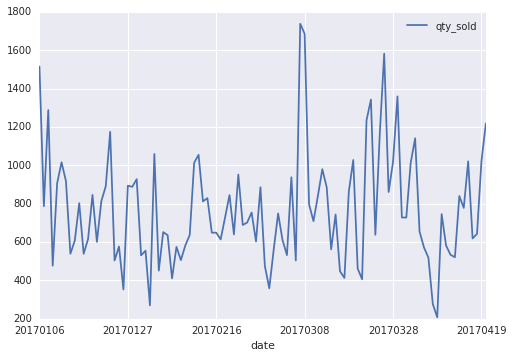

In [10]:
ad.sort_values(by='date',inplace=True)
ad.date = ad.date.astype(str)
print ('Std in dependent: %.2f' % ad.qty_sold.std())
ad.plot(x="date", y="qty_sold", kind="line")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37f6caf990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f37f6b06750>], dtype=object)

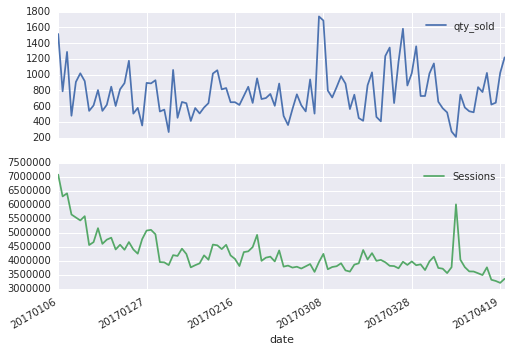

In [12]:
bi=ad[['date','qty_sold','Sessions']]
bi.set_index('date',inplace=True)
#data_roadster_tshirts.plot(x="date", y="total_units",secondary_y="lv_share", kind="line")
bi.plot(subplots=True)

In [ ]:
cor=ad.corr()
cor.to_csv('/data/pratik/tensor/corr.csv')
cor

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
d=ad[['date','qty_sold','output_td_diff','pi_rm','lc_share_pltf','lp_screens','Sessions']]
train, test= train_test_split(d, test_size=0.3, random_state=0)
y_train = train.qty_sold
X_train = train.drop(['qty_sold','date'],axis=1)

y_test = test.qty_sold
X_test = test.drop(['qty_sold','date'],axis=1)

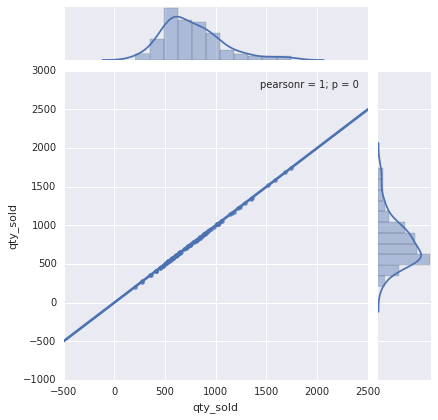

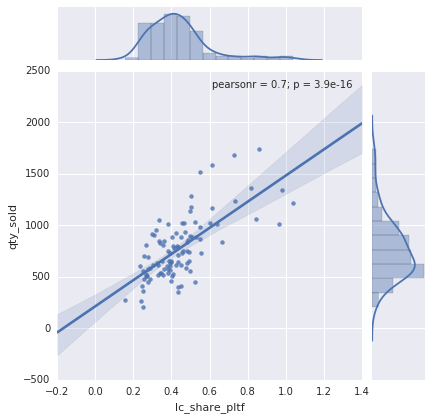

In [14]:
for i in d._get_numeric_data().columns:
    sns.jointplot(x=i, y="qty_sold", data=ad,kind="reg")

In [ ]:
X.corr()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X.shape
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
fs = SelectFromModel(lsvc, prefit=True)
X_new = fs.transform(X)
X_new.shape

In [ ]:
a=fs.get_support([54])

In [ ]:
X.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()

In [15]:
m1 = linear_model.LinearRegression()
m2 = linear_model.Ridge (alpha = .5)
m3 = linear_model.Lasso(alpha = 0.1) 
m4 = linear_model.SGDClassifier(loss="hinge", penalty="l2")
m5 = RandomForestRegressor(n_estimators=50,max_depth=9)
m6 = DecisionTreeRegressor()
m7 = svm.LinearSVC()
m8 = MLPRegressor(alpha=0.01,learning_rate='adaptive',verbose=True,hidden_layer_sizes=(5, 2), random_state=1)
m9 = XGBRegressor()

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Linear Regression
Root Mean squared error: 178.60
Training MAE: 114.56
Validation MAE: 145.12
Variance score: 0.62
R2 score : 0.37
Training MAPE: 15.65
Validation MAPE: 18.16


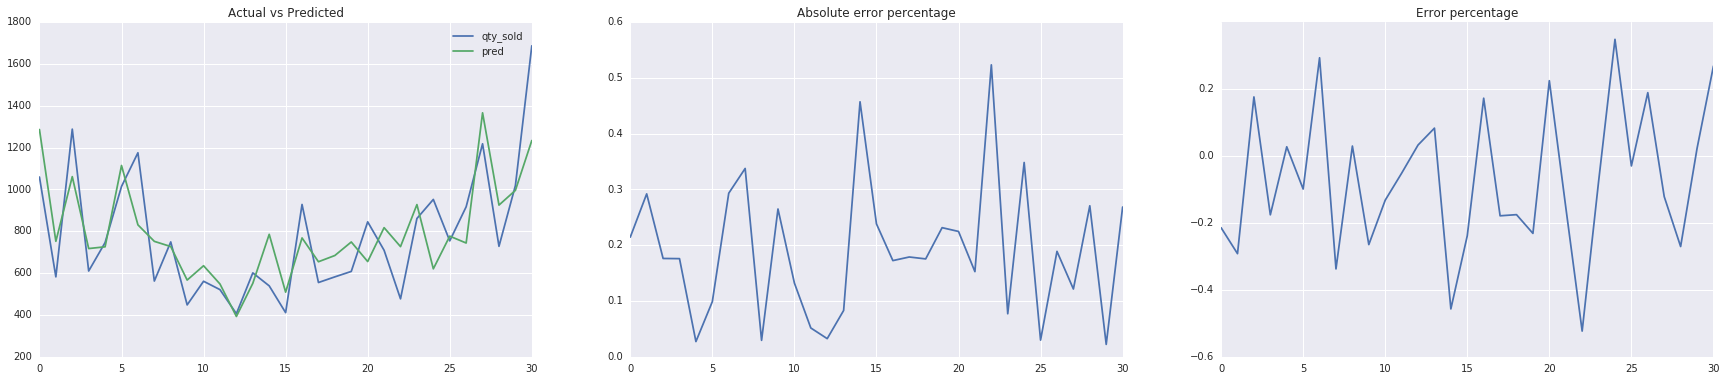

In [16]:
print "Linear Regression"
m1.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m1.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m1.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m1.predict(X_test), y_test))
print('Variance score: %.2f' % m1.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m1.predict(X_test), y_test) )
print( 'Training MAPE: %0.2f' % mape(m1.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m1.predict(X_test), y_test))
pred=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(m1.predict(X_test),columns=['pred'])], axis=1)
pred['ape']=np.abs((pred['qty_sold'] - pred['pred']) / pred['qty_sold'])
pred['ae']=(pred['qty_sold'] - pred['pred']) / pred['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

Ridge Regression
Root Mean squared error: 194.67
Variance score: 0.55
R2 score : -0.07
Training MAE: 135.74
Validation MAE: 157.16
Training MAPE: 17.89
Validation MAPE: 19.96


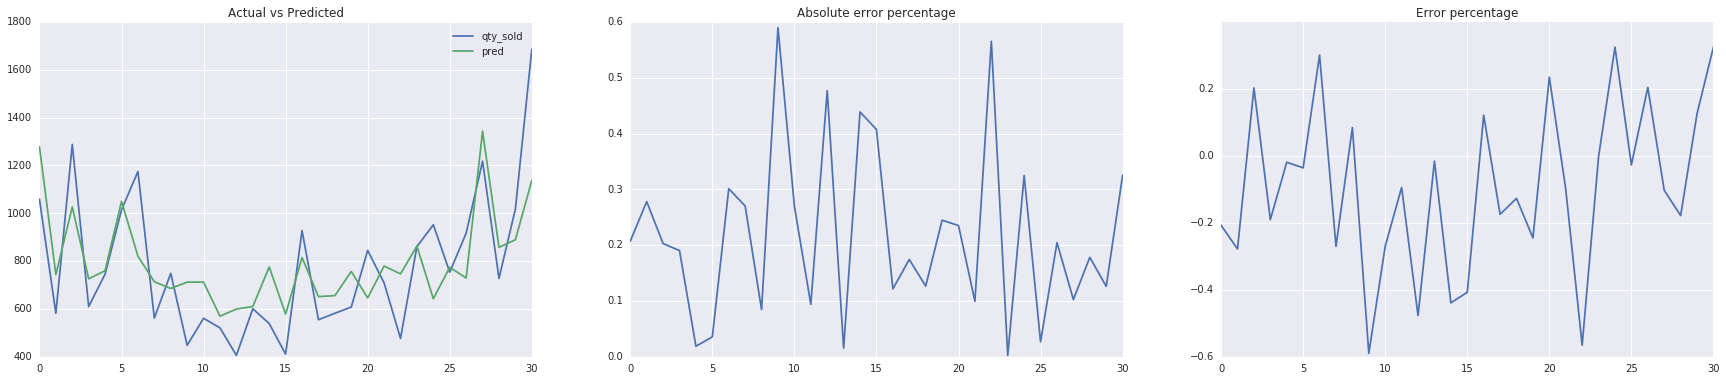

In [17]:
print "Ridge Regression"
m2.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m2.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m2.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m2.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m2.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m2.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m2.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m2.predict(X_test), y_test))
pred=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(m2.predict(X_test),columns=['pred'])], axis=1)
pred['ape']=np.abs((pred['qty_sold'] - pred['pred']) / pred['qty_sold'])
pred['ae']=(pred['qty_sold'] - pred['pred']) / pred['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

In [ ]:
print "Lasso Regression"
m3.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m3.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m3.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m3.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m3.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m3.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m3.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m3.predict(X_test), y_test))

In [ ]:
print "Stochastic Gradient Descent Regression"
m4.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m4.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m4.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m4.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m4.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m4.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m4.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m4.predict(X_test), y_test))

Random Forrest Regression
Root Mean squared error: 176.31
Variance score: 0.63
R2 score : 0.34
Training MAE: 45.12
Validation MAE: 144.28
Training MAPE: 6.46
Validation MAPE: 19.62
Training MAPE: 6.46
Validation MAPE: 19.62


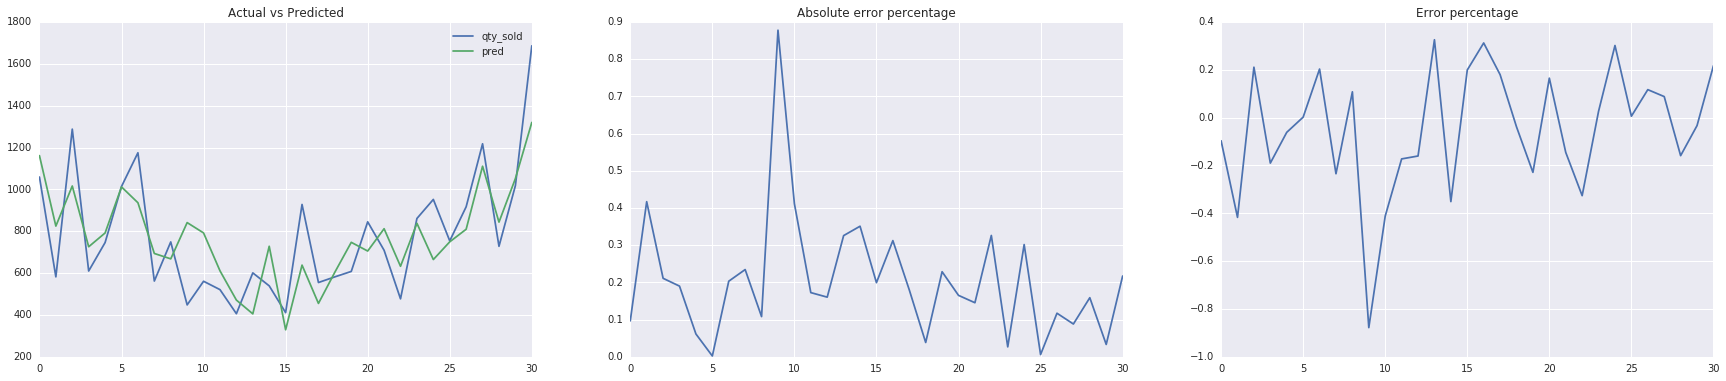

In [18]:
print "Random Forrest Regression"
m5.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m5.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m5.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m5.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m5.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m5.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m5.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m5.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m5.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m5.predict(X_test), y_test))
pred=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(m5.predict(X_test),columns=['pred'])], axis=1)
pred['ape']=np.abs((pred['qty_sold'] - pred['pred']) / pred['qty_sold'])
pred['ae']=(pred['qty_sold'] - pred['pred']) / pred['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

In [ ]:
print "Decision Tree Regression"
m6.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m6.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m6.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m6.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m6.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m6.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m6.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m6.predict(X_test), y_test))

In [ ]:
print "Linear SVM"
m7.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m7.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m7.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m7.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m7.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m7.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m7.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m7.predict(X_test), y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X)  
X_tr = scaler.transform(X_train)  
# apply same transformation to test data
X_te = scaler.transform(X_test)  

In [ ]:
print "MLP nueral network"
m8.fit(X_tr,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m8.predict(X_te) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m8.score(X_te, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m8.predict(X_te), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m8.predict(X_tr), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m8.predict(X_te), y_test))
print( 'Training MAPE: %0.2f' % mape(m8.predict(X_tr), y_train))
print( 'Validation MAPE: %0.2f' % mape(m8.predict(X_te), y_test))

In [ ]:
print "XGBoost"
m9.fit(X_train,y_train)
print("Root Mean squared error: %.2f"
      % math.sqrt(np.mean((m9.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m9.score(X_test, y_test))
print( 'R2 score : %0.2f'% metrics.r2_score(m9.predict(X_test), y_test) )
print( 'Training MAE: %0.2f' % metrics.mean_absolute_error(m9.predict(X_train), y_train))
print( 'Validation MAE: %0.2f' % metrics.mean_absolute_error(m9.predict(X_test), y_test))
print( 'Training MAPE: %0.2f' % mape(m9.predict(X_train), y_train))
print( 'Validation MAPE: %0.2f' % mape(m9.predict(X_test), y_test))
pred=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(m9.predict(X_test),columns=['pred'])], axis=1)
pred['ape']=np.abs((pred['qty_sold'] - pred['pred']) / pred['qty_sold'])
pred['ae']=(pred['qty_sold'] - pred['pred']) / pred['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

In [ ]:
xgb.plot_importance(m9)

In [ ]:
xgb.plot_tree(m9)

In [ ]:
from sklearn.tree import export_graphviz
import os
export_graphviz(m5.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')

In [ ]:
importance = m5.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([m5.feature_importances_
                            for tree in m5.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

In [ ]:
x=sm.add_constant(X_train)
linear_mod = sm.OLS(y_train, x).fit()
print linear_mod.summary()